In [118]:
# Importamos todas las librerías necesarias para nuestro programa

import pandas as pd
import json
import matplotlib.pyplot as plt

# Comprobaciones de estilo PEP-8 con: %%pycodestyle
#%load_ext pycodestyle_magic

In [120]:
# Creamos el data frame de salida mediante pandas con los campos requeridos
output_aux = pd.DataFrame({'usuario': [],
                           'texto': [],
                           'fecha': []})

In [121]:
tweets_data_path = 'streaming.txt'  # Ruta donde se encuentra el fichero

tweets_file = open(tweets_data_path, "r")  # Abrimos el fichero en modo lectura
for line in tweets_file:  # Recorremos línea a línea (cada JSON) el fichero
    tweet = json.loads(line)  # Cargamos la línea en la variable tweet
    # Si el tweet tiene menos de 140 caracteres ejecutamos esta condición
    if tweet['truncated'] is False:
        try:  # Intentamos agregar al data frame los datos con:
            output_aux = output_aux.append(pd.Series({
                'usuario': tweet['user']['name'],
                'texto': tweet['text'],
                'fecha': tweet['created_at']},
                name=tweet['id']))
        # Si el tweet no tiene atributo 'text', se produce un error en el try
        except Exception:
            output_aux = output_aux.append(pd.Series({
                'usuario': tweet['user']['name'],
                'texto': tweet['full_text'],
                'fecha': tweet['created_at']},
                name=tweet['id']))
    # Si el tweet tiene más de 140 caracteres, agregamos los datos como sigue
    elif tweet['truncated'] is True:
        output_aux = output_aux.append(pd.Series({
            'usuario': tweet['user']['name'],
            'texto': tweet['extended_tweet']['full_text'],
            'fecha': tweet['created_at']},
            name=tweet['id']))

In [122]:
def cuenta_palabras(frase):
    """Determina el número de palabras de una frase"""
    # Construimos un vector de palabras separando el texto por espacios.
    auxiliar = frase.split(" ")
    # Devolvemos la longitud (número de palabras) del vector construido
    return(len(auxiliar))

In [123]:
# Creamos las columnas adicionales en el data frame
output_aux['palabras'] = output_aux.texto.apply(cuenta_palabras)
# Contamos la longitud del texto del tweet mediante len
# Aunque los tweets, como máximo, cuentan con 280 caracteres,
# aparecen tweets de mayor tamaño, ya que lo que sigue a una @
# no cuenta para el límite de caracteres del tweet.
output_aux['caracteres'] = output_aux.texto.apply(len)

In [124]:
def string_hour(h):
    """Retorna la hora de la fecha del tweet pasada como string"""
    # Cada espacio de la cadena que contiene la fecha delimita un campo
    aux = h.split(" ")  # Separamos dicha cadena por sus espacios
    hora = aux[3].split(":")  # Extraemos la hora completa (h:m:s) del tweet
    return(hora[0])  # Devolvemos únicamente el valor de la hora

In [125]:
# Creamos la columna 'hora' del data frame aplicando la función string_hour
output_aux['hora'] = output_aux.fecha.apply(string_hour)
output_aux  # Sacamos por pantalla el data frame

,usuario,texto,fecha,palabras,caracteres,hora
1072767092728975360,jorge rabanal,Tiroteo mortal en la ciudad francesa de Estras...,Wed Dec 12 08:16:20 +0000 2018,11,88,08
1072767094054416387,Córdoba 24 horas,Al menos cuatro muertos y diez heridos en un t...,Wed Dec 12 08:16:20 +0000 2018,39,229,08
1072767104670228480,PANDORA,"¿Y si todo está planificado por los más alto, ...",Wed Dec 12 08:16:23 +0000 2018,33,195,08
1072767131710877696,PP Santa Pola,⚫️ Queremos transmitir nuestro más sentido pés...,Wed Dec 12 08:16:29 +0000 2018,25,173,08
1072767154657873921,Gonzalo Semprún,Qué arte ! x Saldaña\n\n#FelizMié...,Wed Dec 12 08:16:35 +0000 2018,19,122,08
1072767170977914880,Jessy Brunos,Eurodiputados y trabajadores del Parlamento Eu...,Wed Dec 12 08:16:39 +0000 2018,17,146,08
1072767191941046273,Blanca,Entras en el TT de Estrasburgo y todo son twee...,Wed Dec 12 08:16:44 +0000 2018,17,85,08
1072767194906406912,Obrero de Derechas,@_ju1_ @OsreOscar Lo de Estrasburgo es el ejér...,Wed Dec 12 08:16:44 +0000 2018,37,223,08
1072767222668513282,Carmen De Carlos,Al final. Tres muertos y varios heridos tras t...,Wed Dec 12 08:16:51 +0000 2018,18,129,08
1072767242318811136,Luis de la Corte,Los indicios apuntan a que el autor del tirote...,Wed Dec 12 08:16:56 +0000 2018,40,280,08


In [126]:
# Agrupamos el dataframe por la columna hora
output_agrupado = output_aux.groupby(['hora']).size()
# Imprimimos por pantalla el DF agrupado
output_agrupado

hora
08    549
09    707
10    747
11    144
dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

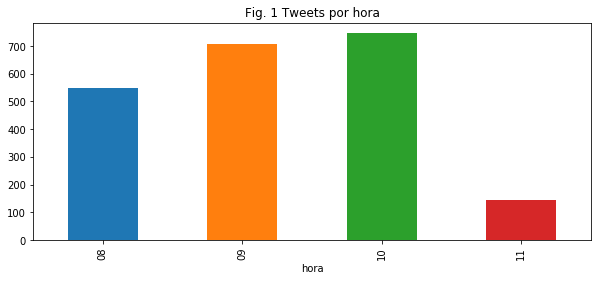

In [127]:
# Sacamos el diagrama de barras con la distribución de tweets por hora
output_aux.groupby(['hora']).size().plot(kind='bar', figsize=(10, 4),
                                         title='Fig. 1 Tweets por hora')
plt.show  # Imprimimos por pantalla el diagrama de barras

<function matplotlib.pyplot.show(*args, **kw)>

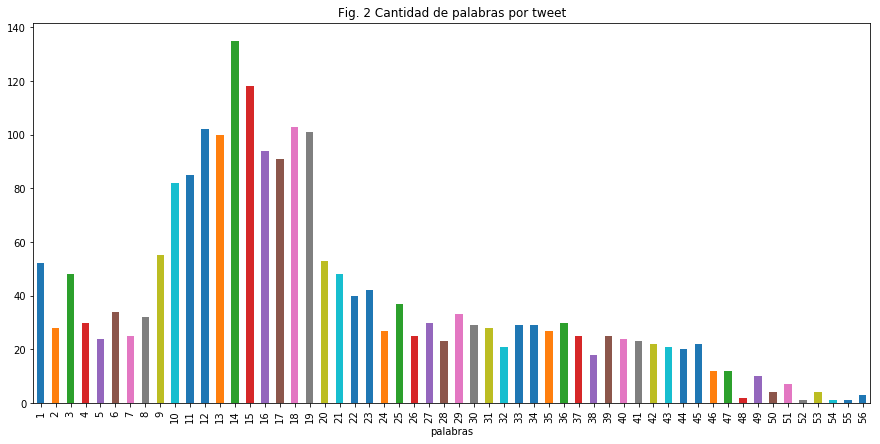

In [128]:
# Sacamos el diagrama de barras del número de palabras por tweet
output_aux.groupby(['palabras']).size().plot(
    kind='bar', figsize=(15, 7), title="Fig. 2 Cantidad de palabras por tweet")
plt.show  # Imprimimos por pantalla el diagrama de barras